In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable

# Bissection Method

In [384]:
def bissection(
      f: Callable[[float], float], 
      a: float, 
      b: float, 
      tol: float, 
      iterations:int = 0
      ) -> float:
    if iterations < 0:
      raise ValueError("Iterations cannot be less than 0")
    
    f_a : float = f(a)
    f_b : float = f(b)
    mid_point : float = (a + b) / 2.0
    f_mid : float = f(mid_point)
    
    if iterations == 0 or abs(f_mid) < tol:
       return mid_point
    else:
       if f_a * f_mid < 0:
          return bissection(f, a, mid_point, tol, iterations - 1)
       else:
          return bissection(f, mid_point, b, tol, iterations - 1)

# False Position Method 

In [385]:
def false_position(
    f: Callable[[float], float],
    a : float, 
    b : float, 
    tol : float,
    iterations:int = 0
    ) -> float:
    if iterations < 0:
      raise ValueError("Iterations cannot be less than 0")
    
    f_a : float = f(a)
    f_b : float = f(b)
    mid_point : float = (a * f_b - b * f_a) / (f_b - f_a)
    f_mid : float = f(mid_point)
    
    if iterations == 0 or abs(f_mid) < tol:
       return mid_point
    else:
       if f_a * f_mid < 0:
          return false_position(f, a, mid_point, tol, iterations - 1)
       else:
          return false_position(f, mid_point, b, tol, iterations - 1)

# Newton-Rhapson Method

In [386]:
def newton_rhapson_method(
    f: Callable[[float], float],
    df: Callable[[float], float],
    guess: float,
    tol: float,
    iterations: int = 0
  ) -> float:
  if iterations < 0:
    raise ValueError("Iterations cannot be less than 0")
  
  f_guess = f(guess)
  df_guess = df(guess)
  new_guess = guess - f_guess / df_guess

  if iterations == 0 or abs(f_guess) < tol:
    return new_guess
  else:
    return newton_rhapson_method(f, df, new_guess, tol, iterations - 1)

# Secant Method

The Secant method was implemented as a variation to the Newton-Raphson method, where instead of giving the method the derivative, is given a function that approximates the derivative for an input $x$, by sampling two neighbor points with a distance from $x$ of $ \frac{1}{10000000} $


In [387]:
def secant_method(
    f: Callable[[float], float],
    guess: float,
    tol: float,
    iterations: int = 0
  ) -> float: 
  df_approximation = lambda x: (f(x + 1e-7) - f(x - 1e-7)) / 2e-7
  return newton_rhapson_method(f, df_approximation, guess, tol, iterations)

# Excercises

### 1- Function $ f(x) = tg(\pi  x) - 6 $ has a zero on $ \frac{1}{\pi}  arctg(6) $. With $x_0 = 0$ and $x_1 = 0.48$ use 10 iterations of each method to find an approximate root.

First let's extract the problem information into code variables

In [388]:
import math
fun = lambda x: math.tan(math.pi * x) - 6.0
iterations = 10
x_0 = 0.0
x_1 = 0.48
real_zero = (1/math.pi) * math.atan(6.0)

Now let's plot the function

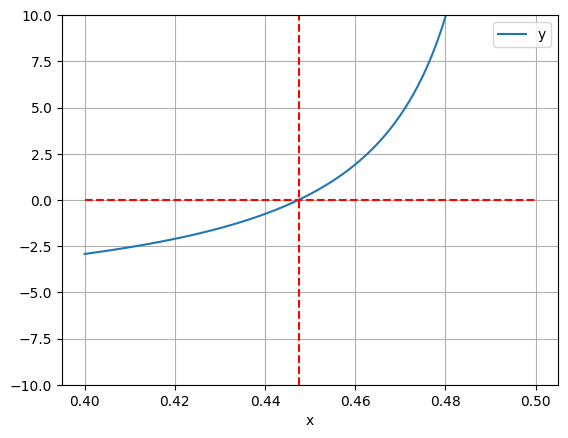

In [389]:
interval_start = 0.4
interval_end = 0.5
number_of_points = 100

# sample function
percent_to_range = lambda percent, range_start, range_end: (range_end - range_start ) * percent + range_start

fun_points = [{
   "x":percent_to_range(x / number_of_points, interval_start, interval_end), 
   "y": fun(percent_to_range(x / number_of_points, interval_start, interval_end)) 
   } for x in range(number_of_points)]

# plot data
df = pd.DataFrame(data=fun_points)
df.plot(kind="line", x="x", y="y")

# zoom the plot where the function is near zero
plt.ylim(-10.0, 10.0)

# plot the real zero
plt.vlines(real_zero, -10, 10, colors='r', linestyles='dashed')
plt.hlines(0, interval_start, interval_end, colors='r', linestyles='dashed')

plt.grid(True)
plt.show()

a) Bissection method

In [390]:
bissection(fun, x_0, x_1, 0.0, iterations)

0.44742187499999997

b) False position method

In [391]:
false_position(fun, x_0, x_1, 0.0, iterations)

0.44538787816283526

c) Secant method

The secant method was implemented using an approximation to the derivative of the function, where two points very close to the point in question were sampled. So the method doesn't have $x_0$ and $x_1$ as inputs, but rather an initial guess.

First let's use the mid of the interval as the initial guess

In [392]:
initial_guess = 0.5 * (x_0 + x_1)
secant_method(fun, initial_guess, 0.0, iterations)

5.447431543288747

This, didn't work too well, the result is diverging.

Now let's use the bissection method to generate an initial guess with 3 iterations and use 7 iterations on the secant method to further refine.

In [393]:
bissection_iterations = 3

initial_guess = bissection(fun, x_0, x_1, 0.0, bissection_iterations)
secant_method(fun, initial_guess, 0.0, iterations - bissection_iterations)

0.4474315432887466

d) Realtive errors comparison


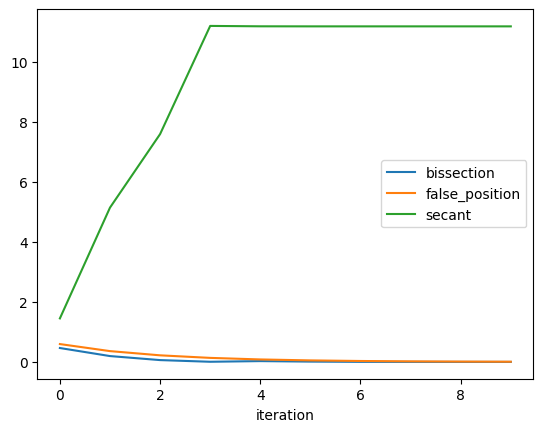

In [394]:
absolute_errors = []
relative_errors = []

# bissection vars
b_a = x_0
b_b = x_1

# false position vars
f_a = x_0
f_b = x_1

# secant vars
s_guess = 0.5 * (x_0 + x_1)

for it in range(iterations):
  b_zero = bissection(fun, b_a, b_b, 0.0)
  f_zero = false_position(fun, f_a, f_b, 0.0)
  s_zero = secant_method(fun, s_guess, 0.0)

  absolute_errors.append({
    "iteration": it,
    "bissection": abs(b_zero - real_zero),
    "false_position": abs(f_zero - real_zero),
    "secant": abs(s_zero - real_zero)
  })

  relative_errors.append({
    "iteration": it,
    "bissection": abs(b_zero - real_zero) / abs(real_zero),
    "false_position": abs(f_zero - real_zero) / abs(real_zero),
    "secant": abs(s_zero - real_zero) / abs(real_zero)
  })

  # update the vars for next iteration
  s_guess = s_zero

  if fun(b_a) * fun(b_zero) < 0:
    b_b = b_zero
  else:
    b_a = b_zero

  if fun(f_a) * fun(f_zero) < 0:
    f_b = f_zero
  else:
    f_a = f_zero

# plot relative error
df = pd.DataFrame(data=relative_errors)
df.plot(kind="line", x="iteration", y=["bissection", "false_position", "secant"])
plt.show()

It' possible to see that the secant method is diverging as the relative error is increasing. As for bissection and false position, both have similar relative errors, but bissection method is better for this function, with the given interval.

### 2 - The polinomial $ f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9 $ has two zeros, one in the interval $[-1.0, 0.0]$ and the other in the interval $[0.0, 1.0]$. Find and approximation to the zeros with precision $ 10 ^ {-6} $

Let's extract the problem information into code

In [395]:
fun = lambda x: 230*math.pow(x, 4) + 18*math.pow(x, 3) + 9*math.pow(x, 2) - 221*x - 9
dx_fun = lambda x: 920*math.pow(x, 3) + 54*math.pow(x, 2) + 18*x - 221
tolerance = 10e-6
intervals = [(-1.0, 0.0), (0.0, 1.0)]

Now let's plot the function graph

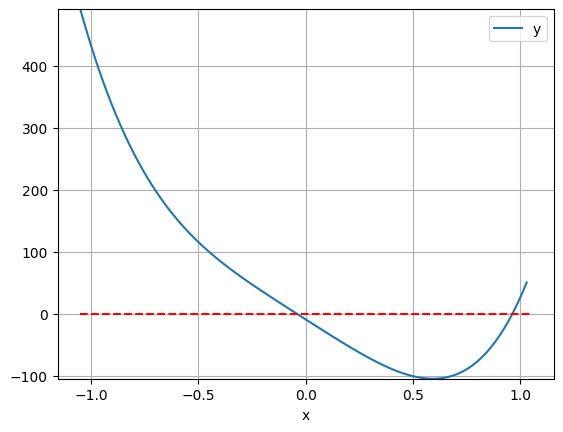

In [396]:
interval_start = -1.05
interval_end = 1.05
number_of_points = 100

# sample function
percent_to_range = lambda percent, range_start, range_end: (range_end - range_start ) * percent + range_start

fun_points = [{
   "x":percent_to_range(x / number_of_points, interval_start, interval_end), 
   "y": fun(percent_to_range(x / number_of_points, interval_start, interval_end)) 
   } for x in range(number_of_points)]

# plot data
df = pd.DataFrame(data=fun_points)
df.plot(kind="line", x="x", y="y")

# zoom the plot where the function is near zero
plt.ylim(df['y'].min(), df['y'].max())

plt.hlines(0, interval_start, interval_end, colors='r', linestyles='dashed')

plt.grid(True)
plt.show()

a) False position method

In [397]:
a = intervals[0][0]
b = intervals[0][1]
val = 0.0
iterations = 0

while True:
  iterations += 1
  val = false_position(fun, a, b, tolerance)
  
  if abs(fun(val)) < tolerance:
    break

  if fun(a) * fun(val) < 0:
    b = val
  else:
    a = val
  
print(f"False position method: {val} with {iterations} iterations")

False position method: -0.04065926140305802 with 21 iterations


In [398]:
a = intervals[1][0]
b = intervals[1][1]
val = 0.0
iterations = 0

while True:
  iterations += 1
  val = false_position(fun, a, b, tolerance)
  
  if abs(fun(val)) < tolerance:
    break

  if fun(a) * fun(val) < 0:
    b = val
  else:
    a = val

print(f"False position method: {val} with {iterations} iterations")

False position method: 0.9623984162684144 with 9 iterations


b) Secant method

In [399]:
a = intervals[0][0]
b = intervals[0][1]
guess = 0.5 * (a + b)
iterations = 0

while True:
  iterations += 1
  guess = secant_method(fun, guess, tolerance)
  
  if abs(fun(guess)) < tolerance:
    break

print(f"Secant method: {guess} with {iterations} iterations")

Secant method: -0.04065928831575898 with 4 iterations


In [400]:
a = intervals[1][0]
b = intervals[1][1]
guess = 0.5 * (a + b)
iterations = 0

while True:
  iterations += 1
  guess = secant_method(fun, guess, tolerance)
  
  if abs(fun(guess)) < tolerance:
    break

print(f"Secant method: {guess} with {iterations} iterations")

Secant method: -0.04065928834533607 with 5 iterations


c) Newton-Raphson method

In [401]:
a = intervals[0][0]
b = intervals[0][1]
guess = 0.5 * (a + b)
iterations = 0

while True:
  iterations += 1
  guess = newton_rhapson_method(fun, dx_fun, guess, tolerance)
  
  if abs(fun(guess)) < tolerance:
    break

print(f"Newton method: {guess} with {iterations} iterations")

Newton method: -0.04065928831575899 with 4 iterations


In [402]:
a = intervals[1][0]
b = intervals[1][1]
guess = 0.5 * (a + b)
iterations = 0

while True:
  iterations += 1
  guess = newton_rhapson_method(fun, dx_fun, guess, tolerance)
  
  if abs(fun(guess)) < tolerance:
    break

print(f"Newton method: {guess} with {iterations} iterations")

Newton method: -0.04065928834533494 with 5 iterations


d) Difference between false position and secant methods

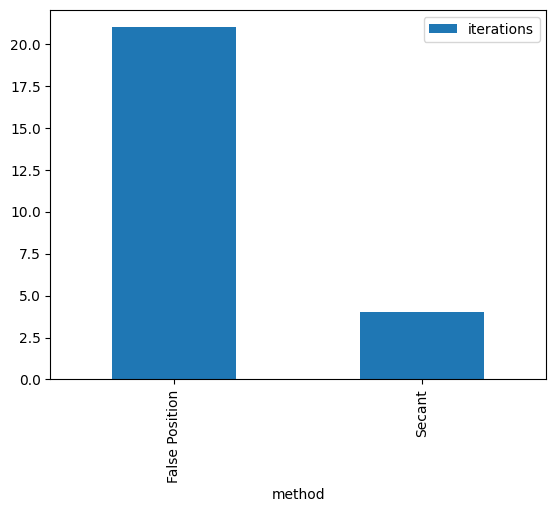

In [403]:
# false position vars
f_a = intervals[0][0]
f_b = intervals[0][1]
false_position_iterations = 0

while True:
  false_position_iterations += 1
  f_zero = false_position(fun, f_a, f_b, tolerance)
  
  if abs(fun(f_zero)) < tolerance:
    break

  if fun(f_a) * fun(f_zero) < 0:
    f_b = f_zero
  else:
    f_a = f_zero

# secant vars
s_guess = 0.5 * (intervals[0][0] + intervals[0][1])
secant_iterations = 0

while True:
  secant_iterations += 1
  s_guess = secant_method(fun, s_guess, tolerance)
  
  if abs(fun(s_guess)) < tolerance:
    break

iterations_df = pd.DataFrame(data=[
  {"method":"False Position", "iterations":false_position_iterations},
  {"method":"Secant", "iterations":secant_iterations}
  ])

iterations_df.plot(kind="bar", x="method", y="iterations")

plt.show()

This graph show the number of iterations to that each method used to achieve a precision of $10 ^{-6}$. The secant method converged much faster than the false position for the zero in the first interval. As for the zero in the second interval, the secant method couldn't find it, and actually converged to the zero on the other interval, that is because, both the secant and the newton methods, work by following the tangent of a function, and as the initial guess was not good enough to find the zero, it actully converged to the other zero.

Let's take a closer loook at the false position behavior first

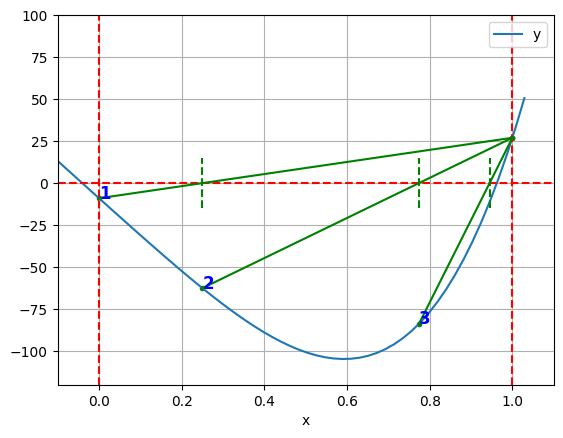

In [404]:
df.plot(kind='line', x='x', y='y')

plt.ylim(-120.0, 100.0)
plt.xlim(-0.1, 1.1)

# interval being used
plt.vlines(0.0, -120, 100, colors='r', linestyles='dashed')
plt.vlines(1.0, -120, 100, colors='r', linestyles='dashed')

plt.hlines(0, -0.1, 1.1, colors='r', linestyles='dashed')


start_int = 0.0
end_int = 1.0
for it in range(3):
  fn_start = fun(start_int)
  fn_end = fun(end_int)
  line_cross_axis_x = false_position(fun, start_int, end_int, 0.0)

  plt.plot([start_int, end_int], [fn_start, fn_end], color='g')

  plt.vlines(line_cross_axis_x,-15, 15, linestyles='dashed', colors='g')

  plt.text(start_int, fn_start, f'{it + 1}', color='b', fontdict={'size': 12, 'weight': 'bold'})

  # plot a cross in the line
  plt.scatter(end_int, fn_end, color='g', marker='.')
  plt.scatter(start_int, fn_start, color='g', marker='.')

  if fun(start_int) * fun(line_cross_axis_x) < 0:
    end_int = line_cross_axis_x
  else:
    start_int = line_cross_axis_x

plt.grid(True)

plt.show()

In the image above is possible to see what each how the false position method is converging to the correct result. Now let's see how the secant method fails to find the correct root.

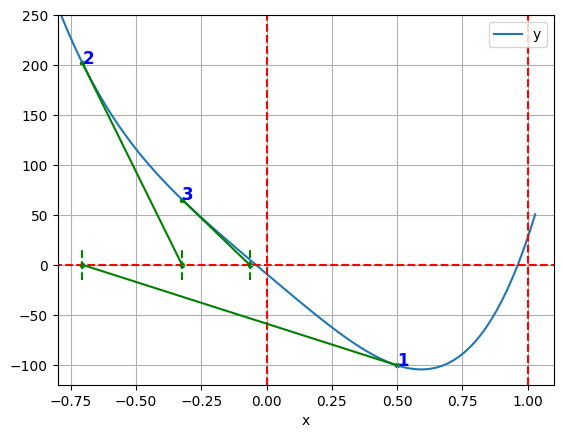

In [405]:
df.plot(kind='line', x='x', y='y')

plt.ylim(-120.0, 250.0)
plt.xlim(-0.8, 1.1)

# interval being used
plt.vlines(0.0, -120, 250, colors='r', linestyles='dashed')
plt.vlines(1.0, -120, 250, colors='r', linestyles='dashed')

plt.hlines(0, -1.1, 1.1, colors='r', linestyles='dashed')

df_approximation = lambda x: (fun(x + 1e-7) - fun(x - 1e-7)) / 2e-7
guess = 0.5 * (0.0 + 1.0)

for it in range(3):
  fn_guess = fun(guess)
  old_guess = guess
  guess = secant_method(fun, guess, 0.0)

  plt.plot([guess, old_guess], [0, fn_guess], color='g')

  plt.vlines(guess,-15, 15, linestyles='dashed', colors='g')

  plt.text(old_guess, fn_guess, f'{it + 1}', color='b', fontdict={'size': 12, 'weight': 'bold'})

  # # plot a cross in the line
  plt.scatter(guess, 0, color='g', marker='.')
  plt.scatter(old_guess, fn_guess, color='g', marker='.')


plt.grid(True)

plt.show()

In this plot is possible to see that the first iteration gives a value for $ x $ that is out of the initial range $ [0.0, 1.0] $ and the next iterations actualy find the other zero of the function. This behavior is due to the way the secant method was implemented, that is sampling two close neighbor points to approximate the tangent at the point. If the method was implemented using the values of $x_0$ and $x_1$ to approximate the derivative, the result may be different.

### 3 - A container have a semicircular transversal section of lengh $L$ and radius $r$. When it's filled with water in a distance $h$ from the top, the water volume is given by: $ V = L  (\frac{1}{2}  \pi  r^2 - r^2  arcsen(\frac{h}{r}) - h  \sqrt{r^2 - h^2}) $. Suppose that $L = 10$ feets, $r = 1$ feet and $ V = 12.4 $ feets. Calculate the water depth with precision of 0.01 using the bissection method

Fisrt let's extract the problem into variables. 

The formula given is for calculating the volume, but in the problem, the volume is already given, and the variable need to be discovered is in fact the depth of the water, the water depth can be calculated as the difference between the heigh $h$ and the radius $r$ ($depth = h - r$).

The interval to be used for the value $h$ can be from 0.0 (in such case the container would be full), and the maximum interval possible is the radius $r$ (in the case when the container is empty)

In [427]:
V = 12.4
L = 10.0
r = 1.0
tolerance = 0.01
volume_fun = lambda h: -V + L * ( pow(r, 2) * (0.5 * math.pi - math.asin(h/r)) - h * math.sqrt(pow(r, 2) - pow(h, 2)) )
interval_start = 0.0
interval_end = r

In [428]:
a = interval_start
b = interval_end
height = 0.0
iterations = 0

while True:
  iterations += 1
  height = bissection(volume_fun, a, b, tolerance)

  if abs(volume_fun(height)) < tolerance:
    break

  if volume_fun(a) * volume_fun(height) < 0:
    b = height
  else:
    a = height

print(f"Bissection method: {height}")
print(f"Water depth: {r - height}")
print(f"Iterations: {iterations}")

Bissection method: 0.166015625
Water depth: 0.833984375
Iterations: 9


### 4 - You are projecting a spheric tank to hold water for a small city. The liquid volume is given by: $ V = \pi  h^2 \frac{3R - h}{3} $ where $V$ is the volume in cubic meters ($m^3$), $h$ is the tank depth in meters ($m$). If $R = 3$, to what depth the tank must be filled to hold $ 30 m^3 $? Use 3 iterations of the Newton-Raphson method to obtain the answer

In this question a volume is given and the depth ($h$) of the tank must be found. 

So first let's extract the problem into variables.

The initial guess used is the raius

In [442]:
V = 30.0
R = 3.0
vol_func = lambda h: -V + math.pi * pow(h, 2) * (3 * R - h) / 3
dx_vol_func = lambda h: math.pi * h * (-h + 2 * R)
iterations = 3
initial_guess = R

In [443]:
water_height = newton_rhapson_method(vol_func, dx_vol_func, initial_guess, 0.0, iterations)
print(f"To achieve 30m^3 is necessary {water_height} meters height")

To achieve 30m^3 is necessary 2.0269057283100134m height


### 5 - The Netwon method does not guarantee conversion, verify that for the inputs below the method doesn't converge

a) $ f(x) = \frac{1}{10} + x  e ^{-x} $

In [446]:
fun = lambda x: 1/10 + x * math.pow(math.e, -x)
dx_fun = lambda x: -math.pow(math.e, -x) * x + math.pow(math.e, -x)
guess = 2.0

Let's see the function graph

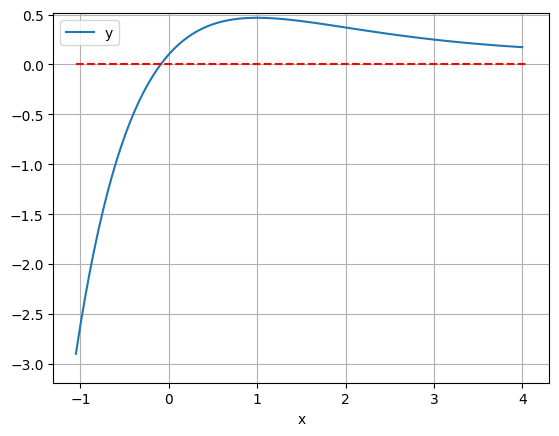

In [454]:
interval_start = -1.05
interval_end = 4.05
number_of_points = 100

# sample function
percent_to_range = lambda percent, range_start, range_end: (range_end - range_start ) * percent + range_start

fun_points = [{
   "x":percent_to_range(x / number_of_points, interval_start, interval_end), 
   "y": fun(percent_to_range(x / number_of_points, interval_start, interval_end)) 
   } for x in range(number_of_points)]

# plot data
df = pd.DataFrame(data=fun_points)
df.plot(kind="line", x="x", y="y")

# zoom the plot where the function is near zero
plt.ylim(df['y'].min() * 1.1, df['y'].max() * 1.1)

plt.hlines(0, interval_start, interval_end, colors='r', linestyles='dashed')

plt.grid(True)
plt.show()

Now let's look at the results from the newton method starting at 2.0

In [465]:
guess = 2.0
for it in range(4):
  guess = newton_rhapson_method(fun, dx_fun, guess, 0.0, 0)
  print(f"Iteration: {it}, result: {guess}")

Iteration: 0, result: 4.738905609893065
Iteration: 1, result: 9.063649465324088
Iteration: 2, result: 117.28071796552558
Iteration: 3, result: 7.393684957031746e+47


It's possible to see that the function's zero is near -0.1, but as the method has a starting point 2.0, it will follow the solpe of the funtion until infinity and will never reach the true zero.

b) $ f(x) = x^3 - x - 3 $ with $ x = -3 $

In [480]:
fun = lambda x: pow(x, 3) - x - 3
dx_fun = lambda x: 3*pow(x, 2) - 1
guess = -3.0

Let's take a look at the function graph

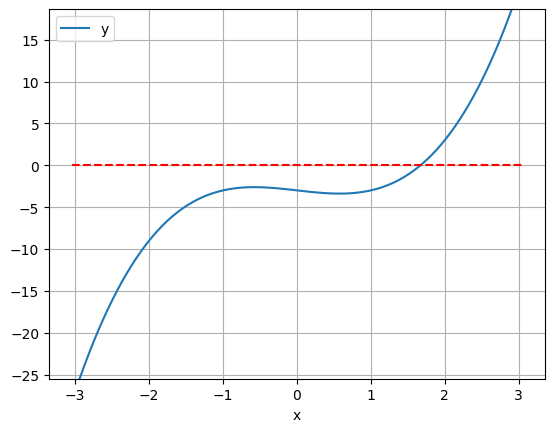

In [477]:
interval_start = -3.05
interval_end = 3.05
number_of_points = 100

# sample function
percent_to_range = lambda percent, range_start, range_end: (range_end - range_start ) * percent + range_start

fun_points = [{
   "x":percent_to_range(x / number_of_points, interval_start, interval_end), 
   "y": fun(percent_to_range(x / number_of_points, interval_start, interval_end)) 
   } for x in range(number_of_points)]

# plot data
df = pd.DataFrame(data=fun_points)
df.plot(kind="line", x="x", y="y")

# zoom the plot where the function is near zero
plt.ylim(df['y'].min() * 0.9, df['y'].max() * 0.9)

plt.hlines(0, interval_start, interval_end, colors='r', linestyles='dashed')

plt.grid(True)
plt.show()

In [481]:
guess = -3.0
for it in range(12):
  guess = newton_rhapson_method(fun, dx_fun, guess, 0.0, 0)
  print(f"Iteration: {it}, result: {guess}")

Iteration: 0, result: -1.9615384615384615
Iteration: 1, result: -1.1471759614035466
Iteration: 2, result: -0.006579371480712082
Iteration: 3, result: -3.000389074071233
Iteration: 4, result: -1.9618181756663249
Iteration: 5, result: -1.1474302284816025
Iteration: 6, result: -0.007256247552423378
Iteration: 7, result: -3.000473188773216
Iteration: 8, result: -1.9618786463602413
Iteration: 9, result: -1.1474851932167662
Iteration: 10, result: -0.007402501332870681
Iteration: 11, result: -3.0004924429169546


For this function we can see a repeating pattern at every four iterations. Let's take a closer look at those 4 iterations

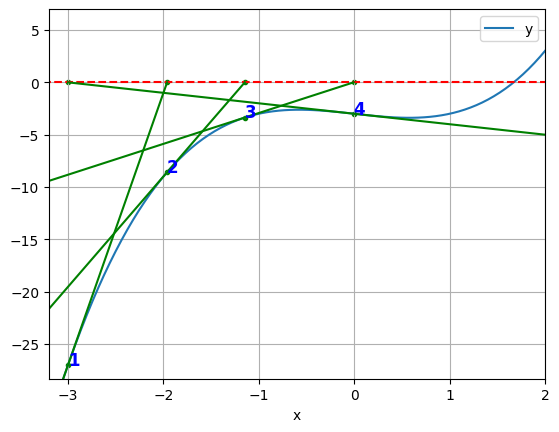

In [506]:
df.plot(kind='line', x='x', y='y')

plt.ylim(df['y'].min(), 7)
plt.xlim(-3.2, 2)


plt.hlines(0, -4, 4, colors='r', linestyles='dashed')

guess = -3.0

tangent_scale_factor = 3.0

for it in range(4):
  fn_guess = fun(guess)
  old_guess = guess
  guess = newton_rhapson_method(fun, dx_fun, guess, 0.0)

  vector = [old_guess - guess, fn_guess - 0]
  vector = [tangent_scale_factor * x for x in vector]

  vector[0] += guess
  vector[1] += 0

  plt.plot([guess, vector[0]], [0, vector[1]], color='g')
  # plt.plot([guess, old_guess], [0, fn_guess], color='g')

  plt.text(old_guess, fn_guess, f'{it + 1}', color='b', fontdict={'size': 12, 'weight': 'bold'})

  # plot a cross in the line
  plt.scatter(guess, 0, color='g', marker='.')
  plt.scatter(old_guess, fn_guess, color='g', marker='.')


plt.grid(True)

plt.show()

With the above picture is possible to see that the method enters a loop, and is not able to find the true root for the function